# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>

#### Luca Camillini - Luglio 2021

## <span style="color:blue">  Esercitazione 10</span>

In questa esercitazione vogliamo sfruttare il calcolo parallelo per risolvere il problema del commesso viaggiatore, utilizzando la classe implementata nell'esercitazione precedente.

### Esercizio 10.1
In questo esercizio sfruttiamo l'algoritmo genetico per trovare il percorso migliore tra città disposte all'interno di un quadrato, utilizzando le stesse impostazioni dell'esercitazione precedente:
- $34$ città
- popolazioni di $200$ individui
- $1000$ generazioni

In più parallelizziamo il codice su $4$ *core* e, ogni $50$ generazioni, andiamo a scambiare l'individui migliore tra due continenti scelti in maniera casuale. Di seguito presentiamo il percorso migliore trovato nei $4$ continenti, l'andamento di $L^{2}$ migliore e lo confrontiamo con quanto trovavamo nell'esercitazione precedente.

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fee2308c310>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fee23094cd0>)

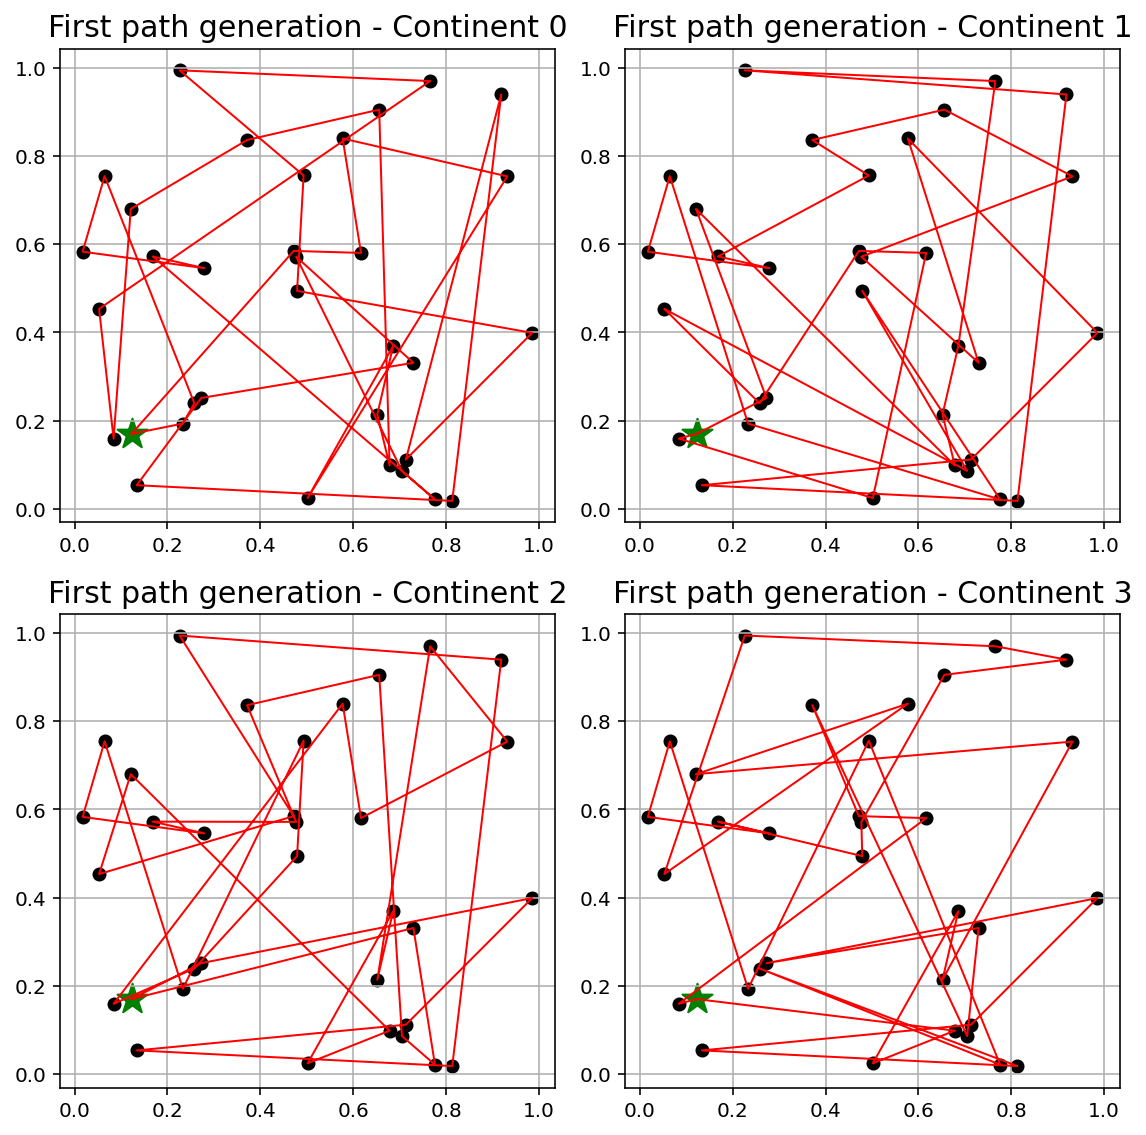

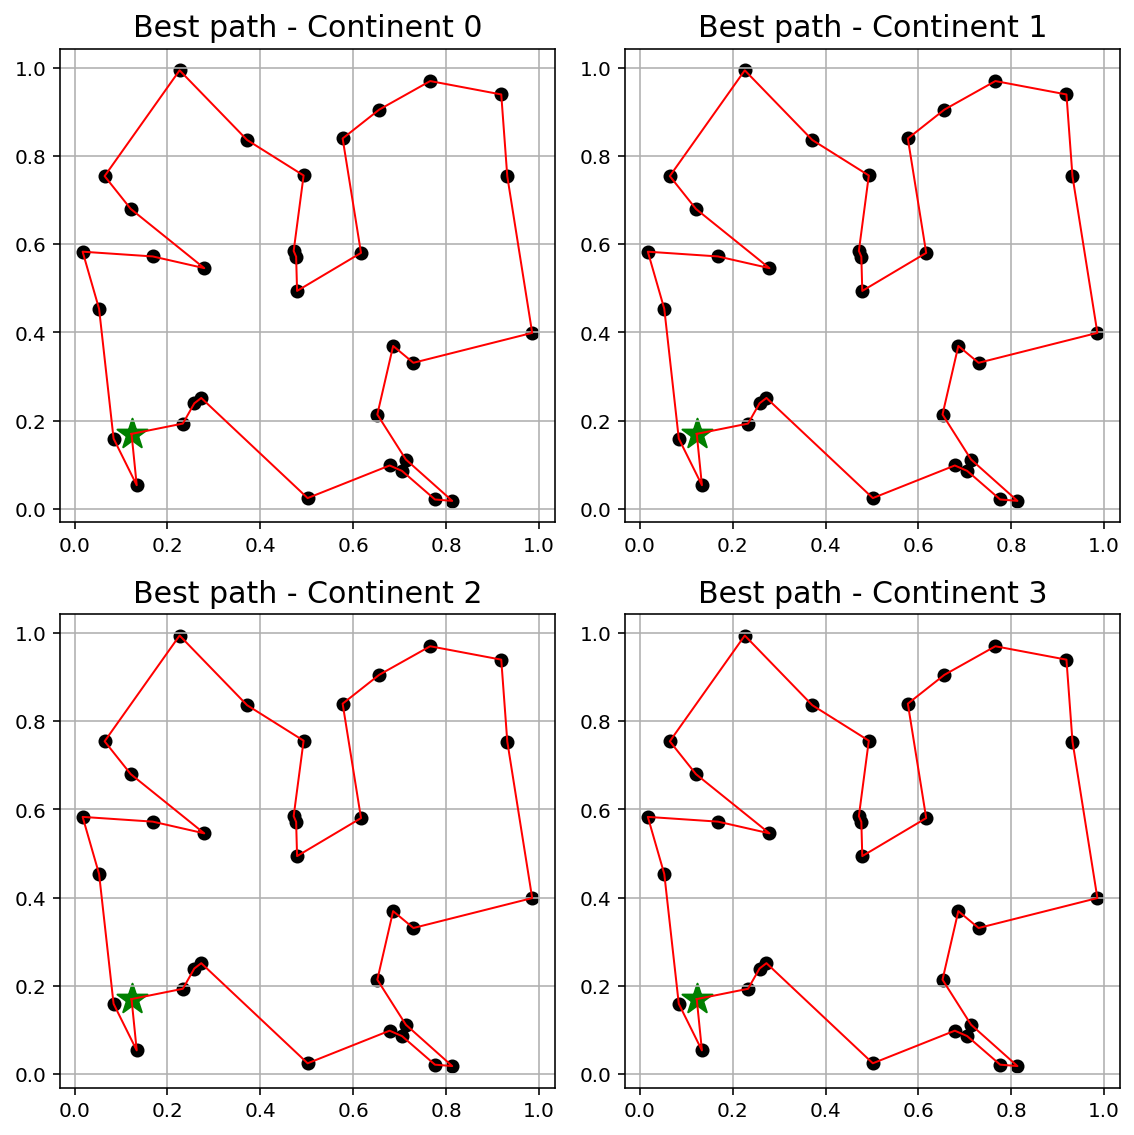

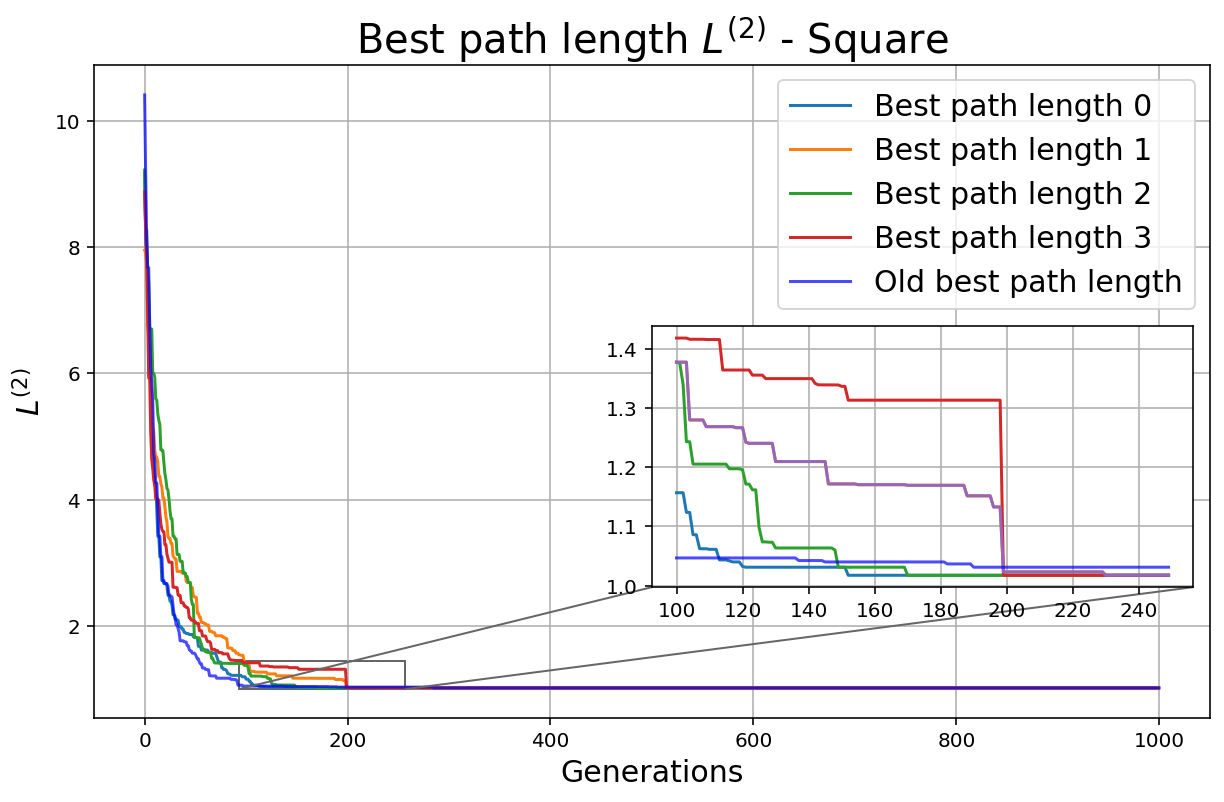

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pandas as pd
%config InlineBackend.figure_format = 'retina'

cities = np.loadtxt('Esercizio 10/cities_coordinates.input')
fig, ax = plt.subplots(2,2,figsize=(8,8))
ax = ax.reshape(-1)

for i in range(4):
    pop = np.loadtxt('Esercizio 10/population_' + str(i) + '.dat')
    x_0 = np.zeros((2,35))
    j=0
    for city in pop[1]:
        x_0[0][j]=cities[int(city)][0]
        x_0[1][j] = cities[int(city)][1]
        j+=1
    ax[i].scatter(x_0[0],x_0[1], marker='o', color = 'black')
    ax[i].scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
    ax[i].plot(x_0[0],x_0[1], color='red', linewidth=1)
    ax[i].set_title('First path generation - Continent ' + str(i), size=15)
    ax[i].grid()
fig.tight_layout()

fig, ax1 = plt.subplots(2,2,figsize=(8,8))
ax1 = ax1.reshape(-1)

for i in range(4):
    pop = np.loadtxt('Esercizio 10/population_' + str(i) + '.dat')
    x_0 = np.zeros((2,35))
    j=0
    for city in pop[999]:
        x_0[0][j]=cities[int(city)][0]
        x_0[1][j] = cities[int(city)][1]
        j+=1
    ax1[i].scatter(x_0[0],x_0[1], marker='o', color = 'black')
    ax1[i].scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
    ax1[i].plot(x_0[0],x_0[1], color='red', linewidth=1)
    ax1[i].set_title('Best path - Continent ' + str(i), size=15)
    ax1[i].grid()
fig.tight_layout()

x = np.arange(0,500,1)
a=100
b=250

fig, ax = plt.subplots(figsize=(10,6))
axins=ax.inset_axes([0.5,0.2,0.485,0.4])

for i in range(4):
    fitness = np.loadtxt("Esercizio 10/fitness_" + str(i) + ".dat")
    ax.plot(fitness, label='Best path length ' + str(i))
    axins.plot(x[a:b],fitness[a:b])
axins.plot(x[a:b],fitness_1[a:b])
ax.set_xlabel('Generations', size=15)
ax.set_ylabel(r'$L^{(2)}$', size=15)
ax.set_title(r'Best path length $L^{(2)}$ - Square', size=20)
ax.grid()
ax.legend(fontsize=10)

ax.plot(fitness_ex_9, label='Old best path length', color='b', alpha=0.7)
ax.set_xlabel('Generations', size=15)
axins.plot(x[a:b],fitness_ex_9[a:b], color='b', alpha=0.7)
ax.legend(fontsize=15)

axins.grid()
mark_inset(ax, axins, loc1=3, loc2=4, ec='0.4')

In questi primi grafici osserviamo che in tutti e quattro i casi le soluzioni convergono alla stessa successione di città da visitare.

Osservando dall'andamento di $L^{2}$ nei diversi core vediamo dei salti a gradini. Questi indicano che o è stata trovata una soluzione migliore rispetto alle generazioni precedenti, oppure, se le linee convergono allo stesso livello, vuol dire che è avvenuto un scambio tra i continenti (nel continente $3$ ciò avviene in maniera particolarmente evidente). Confrontando questi risultati con quanto ricavato nell'esercitazione $9$ (*old best path length*) osserviamo che non parallellizzando inizialmente si converge più velocemente a una soluzione ottimale, dalla quale, tuttavia, il sistema fatica ad uscire: già dalla generazione $120$, nel continente $0$ è già stata trovata la soluzione ottimale. Ciò mostra come il calcolo parallelo porti più rapidamente alla soluzione ottimale.

### Esercizio 10.2

Applichiamo ora il codice da noi sviluppatto alle capitali del *Nord America*. In particolare leggiamo da un file la latitudine e la longitudine delle diverse città che, nel nostro caso, interpretiamo come coordinate $(x,y)$ all'interno di un piano cartesiano (chiaramente stiamo deformando la geometria perché passiamo da una superficie sferica a un piano, ma questo non influisce sulla ricerca della successione di città da visitare migliore). Anche in questo caso abbiamo usato $4$ continenti e scambiato in maniera casuale i due individui migliori ogni $50$ generazioni.

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7fee24016cd0>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7fee24030f70>)

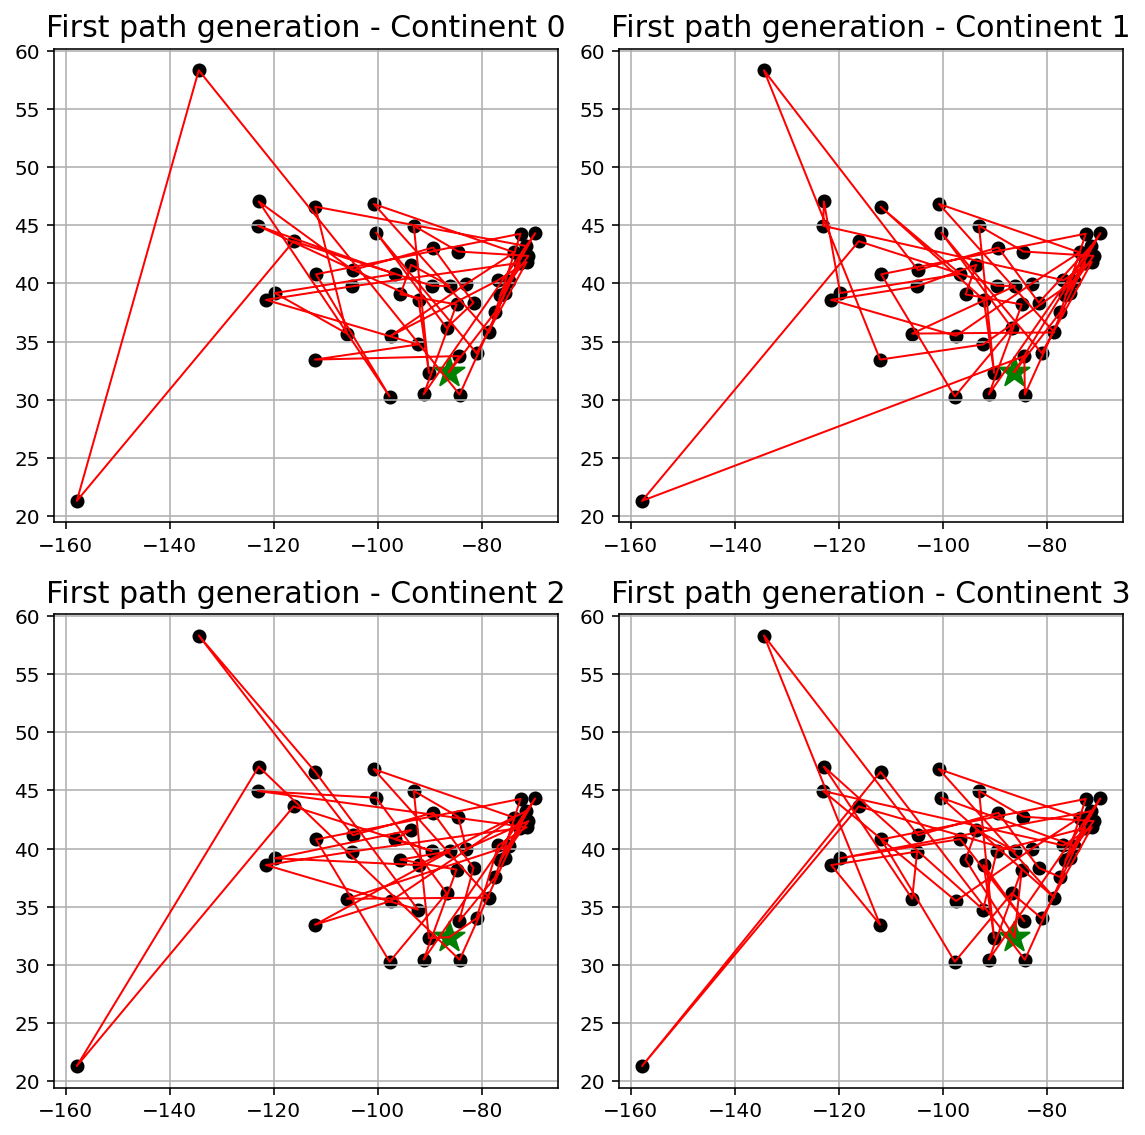

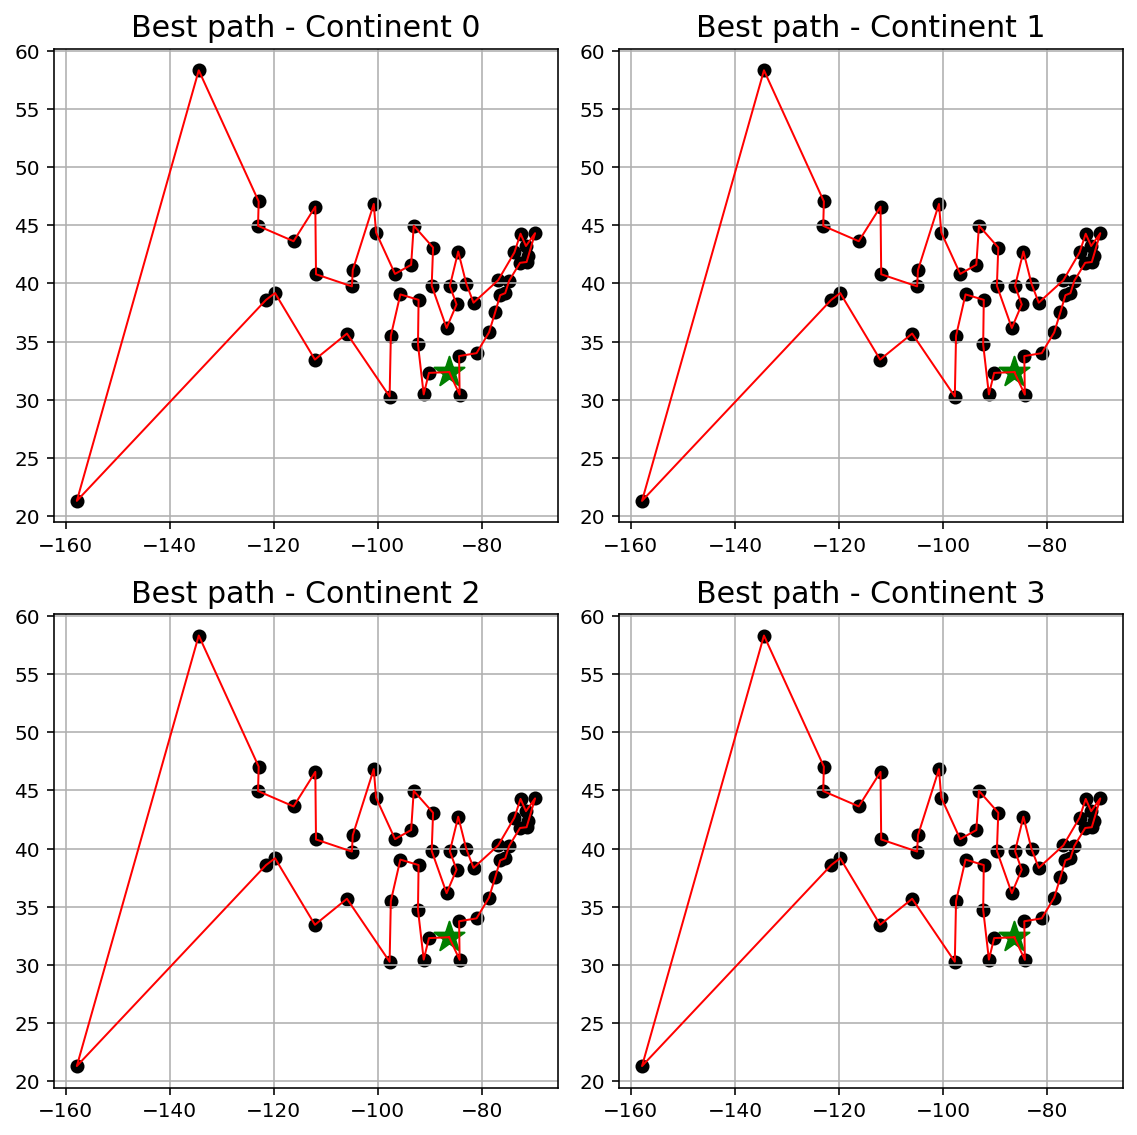

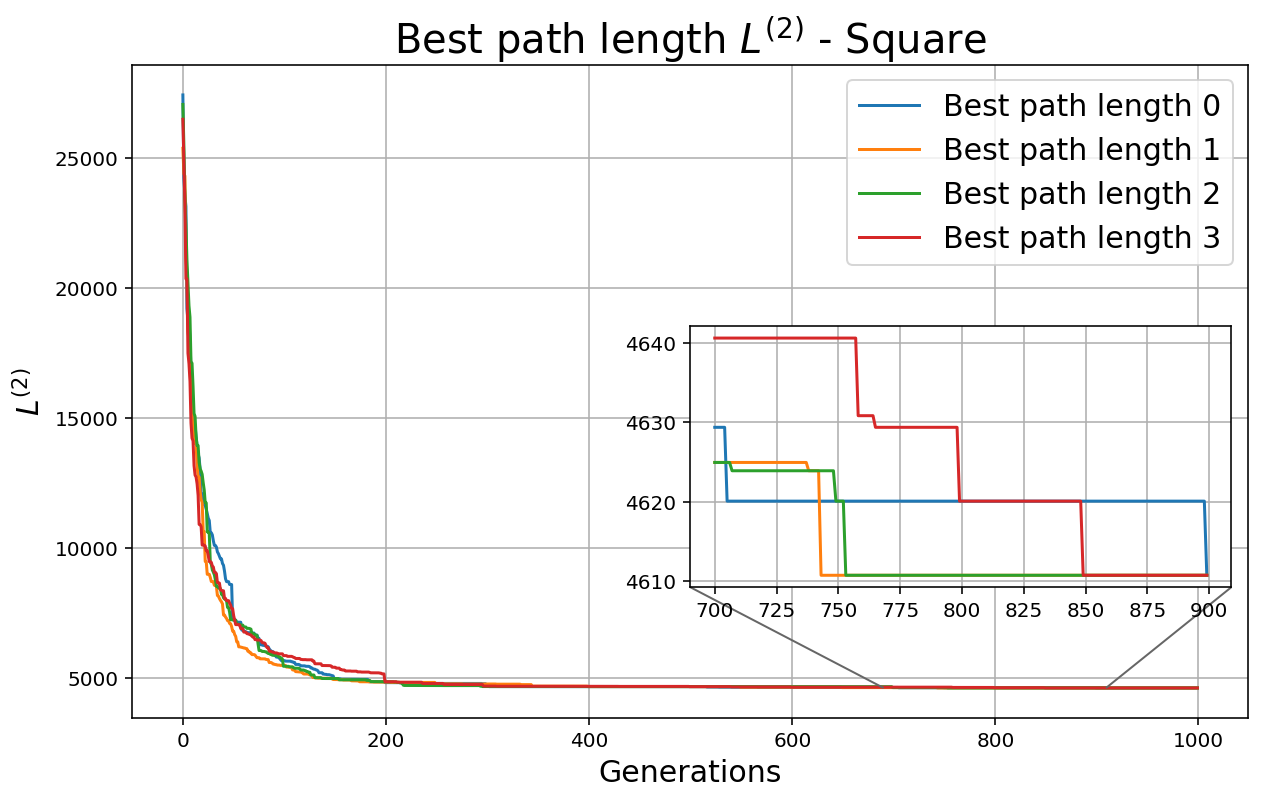

In [114]:
cities = np.loadtxt('American Capitals//cities_coordinates.input')
fig, ax = plt.subplots(2,2,figsize=(8,8))
ax = ax.reshape(-1)

for i in range(4):
    pop = np.loadtxt('American Capitals/population_' + str(i) + '.dat')
    x_0 = np.zeros((2,51))
    j=0
    for city in pop[1]:
        x_0[0][j]=cities[int(city)][0]
        x_0[1][j] = cities[int(city)][1]
        j+=1
    ax[i].scatter(x_0[0],x_0[1], marker='o', color = 'black')
    ax[i].scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
    ax[i].plot(x_0[0],x_0[1], color='red', linewidth=1)
    ax[i].set_title('First path generation - Continent ' + str(i), size=15)
    ax[i].grid()
fig.tight_layout()

fig, ax1 = plt.subplots(2,2,figsize=(8,8))
ax1 = ax1.reshape(-1)

for i in range(4):
    pop = np.loadtxt('American Capitals/population_' + str(i) + '.dat')
    x_0 = np.zeros((2,51))
    j=0
    for city in pop[999]:
        x_0[0][j]=cities[int(city)][0]
        x_0[1][j] = cities[int(city)][1]
        j+=1
    ax1[i].scatter(x_0[0],x_0[1], marker='o', color = 'black')
    ax1[i].scatter(x_0[0][0],x_0[1][0], marker='*', s=250, color='green')
    ax1[i].plot(x_0[0],x_0[1], color='red', linewidth=1)
    ax1[i].set_title('Best path - Continent ' + str(i), size=15)
    ax1[i].grid()
fig.tight_layout()

x = np.arange(0,1000,1)
a=700
b=900

fig, ax = plt.subplots(figsize=(10,6))
axins=ax.inset_axes([0.5,0.2,0.485,0.4])

for i in range(4):
    fitness = np.loadtxt("American Capitals/fitness_" + str(i) + ".dat")
    ax.plot(fitness, label='Best path length ' + str(i))
    axins.plot(x[a:b],fitness[a:b])
ax.set_xlabel('Generations', size=15)
ax.set_ylabel(r'$L^{(2)}$', size=15)
ax.set_title(r'Best path length $L^{(2)}$ - Square', size=20)
ax.grid()
ax.legend(fontsize=15)

axins.grid()
mark_inset(ax, axins, loc1=3, loc2=4, ec='0.4')

Anche in questo caso vediamo che il sistema converge a una soluzione ottimale, anche se più lentamente rispetto al caso precedente. Questo non ci deve stupire in quanto abbiamo $50$ città da visitare invece che $34$ avendo mantenuto il numero di individui in una popolazione sempre pari a $200$ in entrambi i casi. Pertanto, aumentando le città ma non il numero di individui in una popolazione, l'informazione in essa contenuta sarà minore e quindi più lunga l'evoluzione del sistema per arrivare alla soluzione ottimale.